<h1 align=center><font size = 5> Lọc cự ly </font></h1>

In [1]:
import sys
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as path
lib_path =  path.abspath(path.join('' ,"../../api/common"))
sys.path.insert(1, lib_path)
from transform_split_data import transform_split_data
from predict import predict, evaluate
from filter_outlier import filter_outlier_value_range

%load_ext autotime
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


time: 109 ms


### <span style="color:blue">1.Load data</span>

In [2]:
# Load dữ liệu
df = pd.read_csv('..\\pre_process_data\\pre_process_data.csv', encoding='utf-8')
data_df = df.copy()
data_df

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494336,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,1,58.378378
494337,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,0,57.857143
494338,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,3.0,2.0,,1009.0,1,2,,0,57.754011
494339,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,0.0,2.0,,411.0,1,2,,0,57.497782


time: 5.12 s


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494341 entries, 0 to 494340
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id$Year                      494341 non-null  int64  
 1   id$MonthDay                  494341 non-null  int64  
 2   id$JyoCD                     494341 non-null  int64  
 3   id$Kaiji                     494341 non-null  int64  
 4   id$Nichiji                   494341 non-null  int64  
 5   id$RaceNum                   494341 non-null  int64  
 6   race_id                      494341 non-null  int64  
 7   Year                         494341 non-null  int64  
 8   Month                        494341 non-null  int64  
 9   RaceInfo$TokuNum             494341 non-null  int64  
 10  RaceInfo$Nkai                494341 non-null  int64  
 11  GradeCD                      494341 non-null  object 
 12  JyokenInfo$SyubetuCD         494341 non-null  int64  
 13 

### <span style="color:blue">2.Tìm hiểu phân bố dữ liệu trong khoảng tốc độ bị phân tích sai nhiều nhất</span> 

#### <span style="color:blue">2.1. Kyori </span>  

In [4]:
data_df['Kyori'] = data_df['Kyori'].astype('category')
data_df['Kyori'].describe(include='category')

count     494341
unique        48
top         1800
freq      109253
Name: Kyori, dtype: int64

time: 188 ms


- Các giá trị q1, q3 được tính từ file ANN_test

In [5]:
q1 = 56.92
q3 = 59.92
analys = data_df[(data_df['speed']>=q1)&(data_df['speed']<=q3)]
analys

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494336,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,1,58.378378
494337,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,0,57.857143
494338,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,3.0,2.0,,1009.0,1,2,,0,57.754011
494339,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,0.0,2.0,,411.0,1,2,,0,57.497782


time: 312 ms


- Phân bố trên toàn tập train

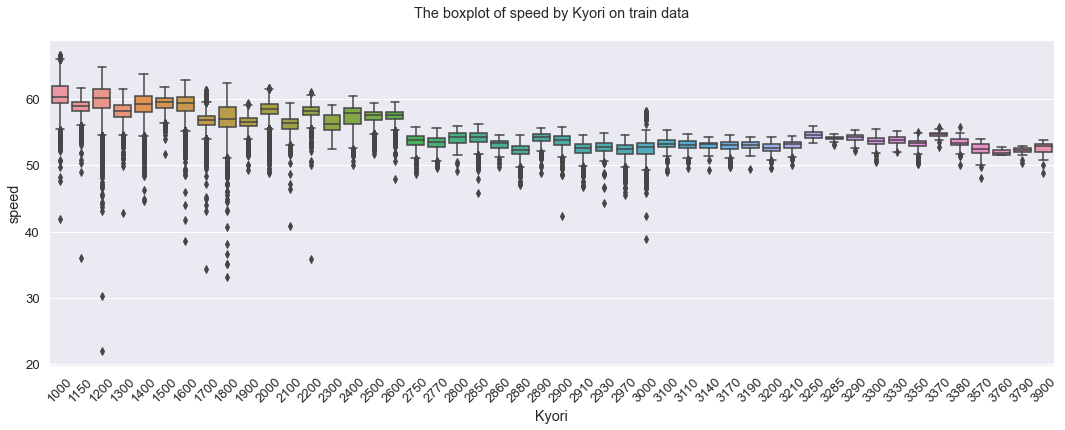

time: 1.38 s


In [6]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại cự ly
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(18, 6))
ax = sns.boxplot(x='Kyori', y="speed", data=data_df);
plt.title('The boxplot of speed by Kyori on train data', y=1.05)
plt.xlabel('Kyori')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

- Phân bố trên toàn tập False

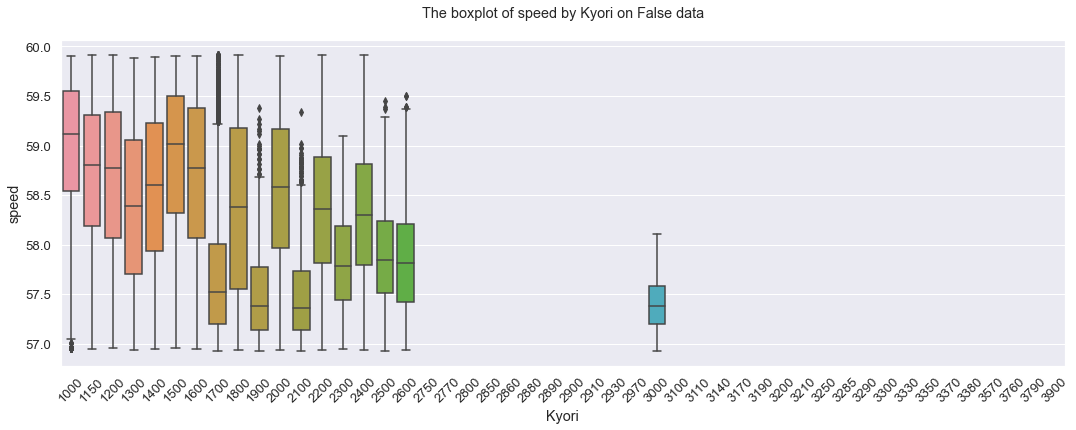

time: 1.01 s


In [7]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại cự ly
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(18, 6))
ax = sns.boxplot(x='Kyori', y="speed", data=analys);
plt.title('The boxplot of speed by Kyori on False data', y=1.05)
plt.xlabel('Kyori')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

- Biểu đồ phân bố Kyori trong khoảng lỗi

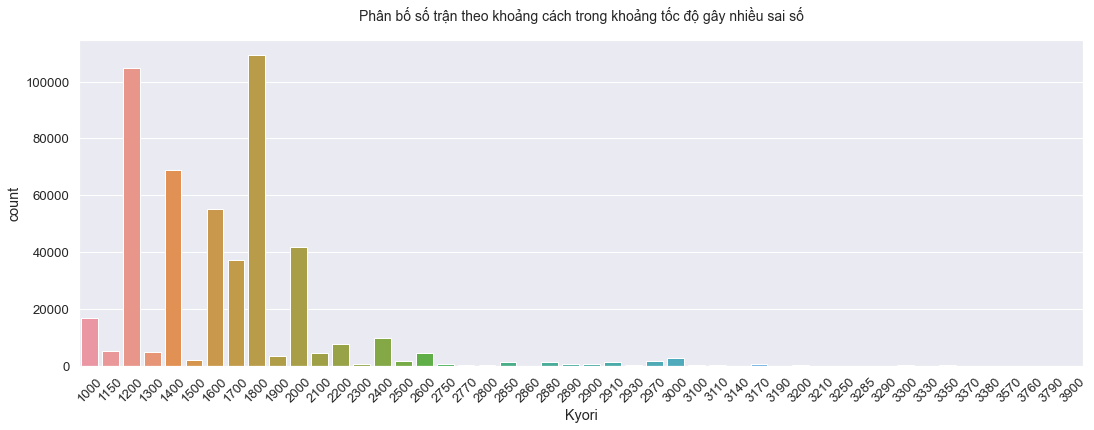

time: 922 ms


In [8]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Kyori", data=data_df)
plt.title('Phân bố số trận theo khoảng cách trong khoảng tốc độ gây nhiều sai số', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

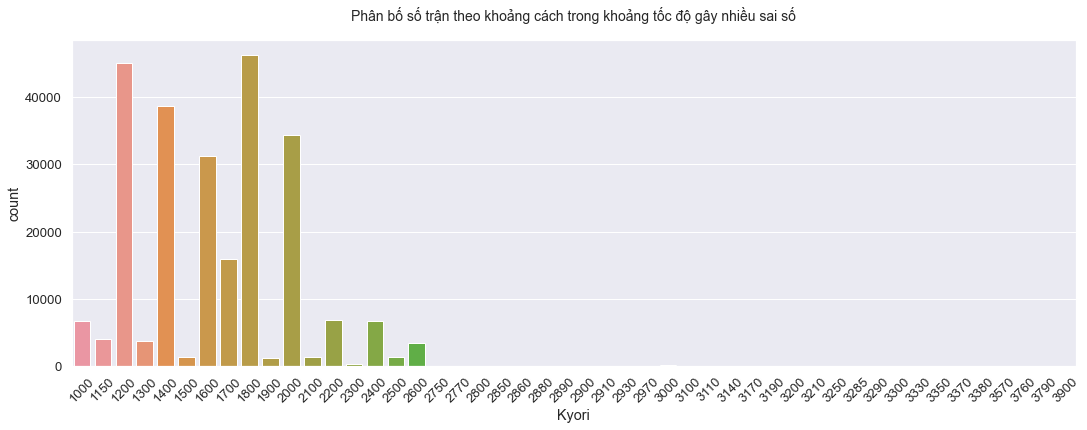

time: 906 ms


In [9]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Kyori", data=analys)
plt.title('Phân bố số trận theo khoảng cách trong khoảng tốc độ gây nhiều sai số', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

- <span style="color:blue">Nhận xét:
    - Số trận đấu trong những cự ly xảy ra sai số nhiều cũng nhiều hơn các cự ly còn lại, cho nên chưa có gì là bất thường

#### <span style="color:blue">2.2. TenKo </span>  

In [10]:
data_df['TenkoBaba$DirtBabaCD'] = data_df['TenkoBaba$DirtBabaCD'].astype('category')
data_df['TenkoBaba$DirtBabaCD'].describe(include='category')

count     494341
unique         5
top            0
freq      236985
Name: TenkoBaba$DirtBabaCD, dtype: int64

time: 188 ms


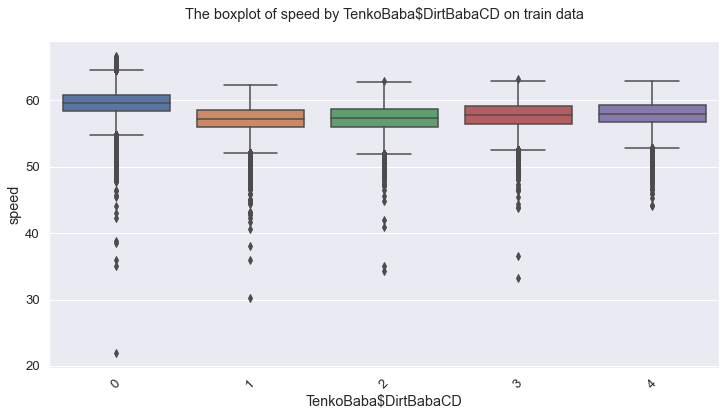

time: 390 ms


In [11]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại TenkoBaba$DirtBabaCD
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='TenkoBaba$DirtBabaCD', y="speed", data=data_df);
plt.title('The boxplot of speed by TenkoBaba$DirtBabaCD on train data', y=1.05)
plt.xlabel('TenkoBaba$DirtBabaCD')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

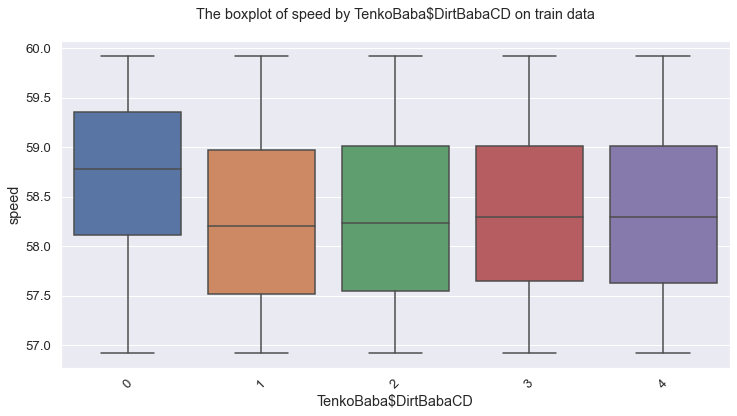

time: 375 ms


In [12]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại TenkoBaba$DirtBabaCD
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='TenkoBaba$DirtBabaCD', y="speed", data=analys);
plt.title('The boxplot of speed by TenkoBaba$DirtBabaCD on train data', y=1.05)
plt.xlabel('TenkoBaba$DirtBabaCD')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

In [13]:
data_df['TenkoBaba$SibaBabaCD'] = data_df['TenkoBaba$SibaBabaCD'].astype('category')
data_df['TenkoBaba$SibaBabaCD'].describe(include='category')

count     494341
unique         5
top            0
freq      248872
Name: TenkoBaba$SibaBabaCD, dtype: int64

time: 172 ms


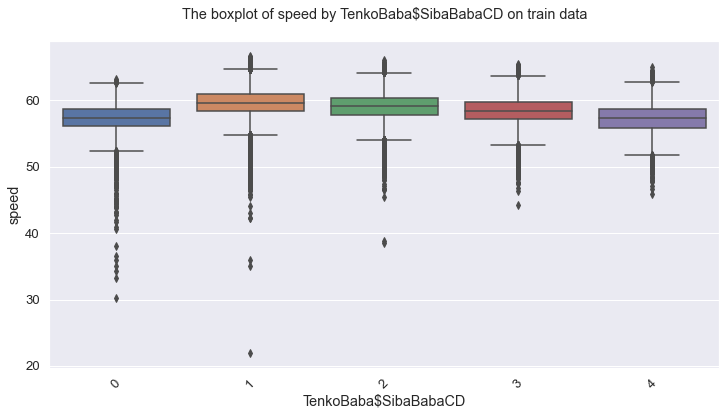

time: 407 ms


In [14]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại TenkoBaba$SibaBabaCD
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='TenkoBaba$SibaBabaCD', y="speed", data=data_df);
plt.title('The boxplot of speed by TenkoBaba$SibaBabaCD on train data', y=1.05)
plt.xlabel('TenkoBaba$SibaBabaCD')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

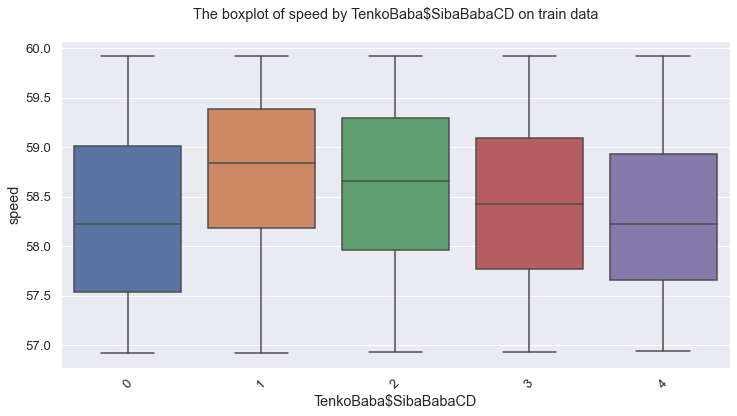

time: 360 ms


In [15]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại TenkoBaba$SibaBabaCD
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='TenkoBaba$SibaBabaCD', y="speed", data=analys);
plt.title('The boxplot of speed by TenkoBaba$SibaBabaCD on train data', y=1.05)
plt.xlabel('TenkoBaba$SibaBabaCD')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

- <span style="color:blue">Nhận xét:
    - Tenko ko có gì bất thường

#### <span style="color:blue">2.3. RaceNum </span>  

In [16]:
data_df['id$RaceNum'] = data_df['id$RaceNum'].astype('category')
data_df['id$RaceNum'].describe(include='category')

count     494341
unique        12
top            3
freq       44668
Name: id$RaceNum, dtype: int64

time: 172 ms


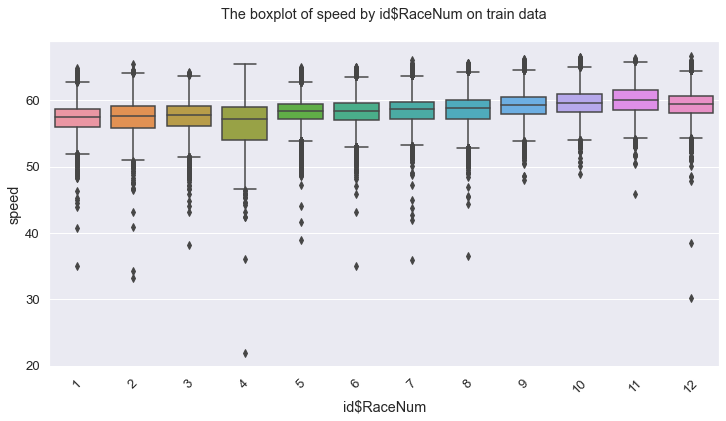

time: 610 ms


In [17]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại id$RaceNum
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='id$RaceNum', y="speed", data=data_df);
plt.title('The boxplot of speed by id$RaceNum on train data', y=1.05)
plt.xlabel('id$RaceNum')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

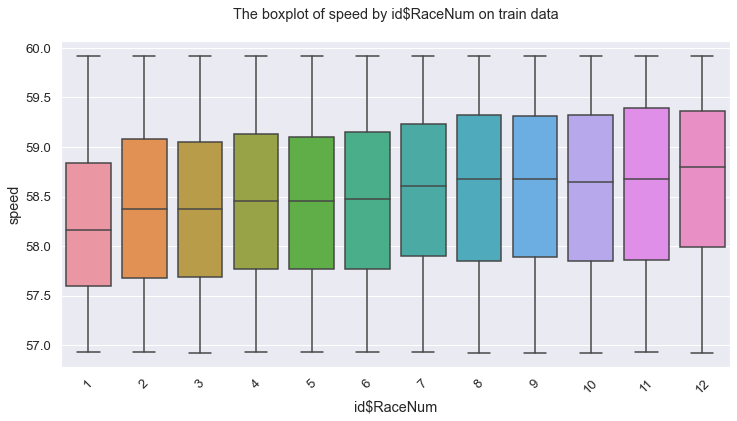

time: 469 ms


In [18]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại id$RaceNum
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='id$RaceNum', y="speed", data=analys);
plt.title('The boxplot of speed by id$RaceNum on train data', y=1.05)
plt.xlabel('id$RaceNum')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

#### <span style="color:blue">2.4. TrackCD </span>  

In [19]:
data_df['TrackCD'] = data_df['TrackCD'].astype('category')
data_df['TrackCD'].describe(include='category')

count     494341
unique        12
top           24
freq      169728
Name: TrackCD, dtype: int64

time: 172 ms


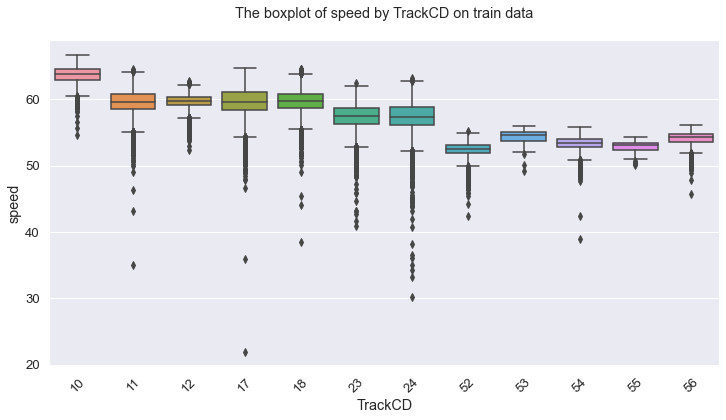

time: 485 ms


In [20]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại TrackCD
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='TrackCD', y="speed", data=data_df);
plt.title('The boxplot of speed by TrackCD on train data', y=1.05)
plt.xlabel('TrackCD')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

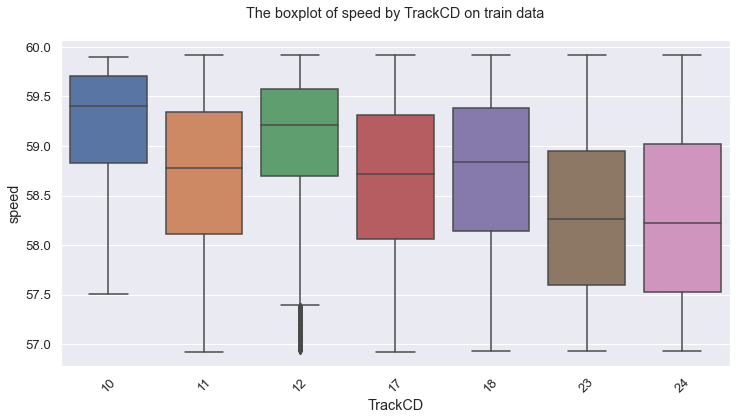

time: 406 ms


In [21]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại TrackCD
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='TrackCD', y="speed", data=analys);
plt.title('The boxplot of speed by TrackCD on train data', y=1.05)
plt.xlabel('TrackCD')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

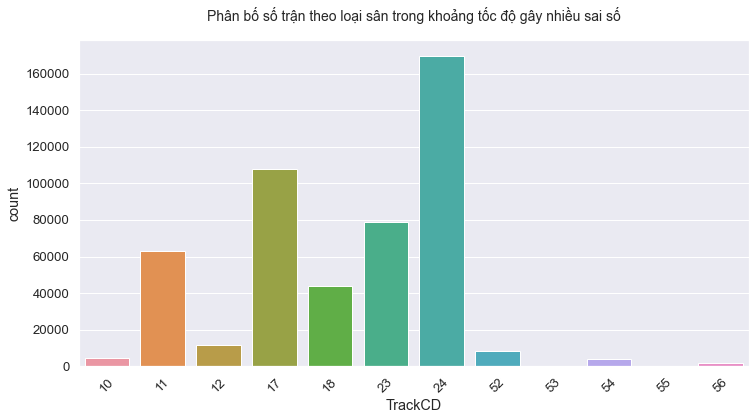

time: 375 ms


In [22]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="TrackCD", data=data_df)
plt.title('Phân bố số trận theo loại sân trong khoảng tốc độ gây nhiều sai số', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

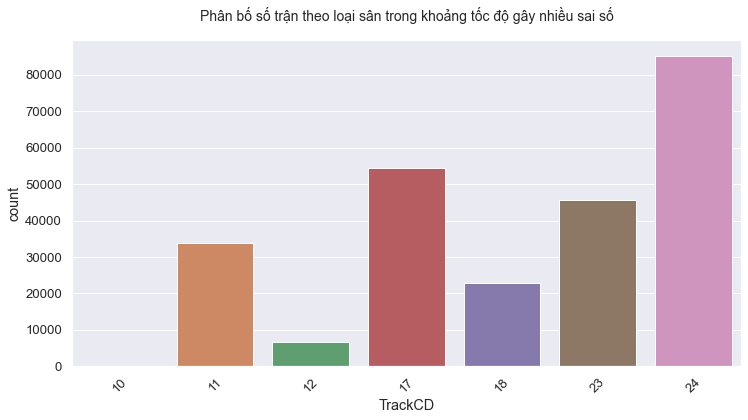

time: 359 ms


In [23]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="TrackCD", data=analys)
plt.title('Phân bố số trận theo loại sân trong khoảng tốc độ gây nhiều sai số', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

#### <span style="color:blue">2.5. Phân tích dữ liệu False </span>  

In [24]:
top3_False = pd.read_csv('top3_False.csv')
top3_False

,id$Year,race_id,KettoNum,speed,Time,KakuteiJyuni,top3,pred_speed,rank,top3_pred,check
0,2018,34535,2015104342,58.695652,73.60,7,0,58.323720,2,1,False
1,2018,34535,2015101022,58.064516,74.40,10,0,58.159218,3,1,False
2,2018,34535,2015105549,59.016393,73.20,3,1,58.005974,4,0,False
3,2018,34535,2015106010,59.178082,73.00,2,1,57.791150,6,0,False
4,2018,34537,2015104474,54.938533,117.95,6,0,54.753036,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
4708,2018,35924,2014101512,57.186082,132.20,1,1,56.762070,10,0,False
4709,2018,35925,2014105543,57.857143,112.00,5,0,57.462875,1,1,False
4710,2018,35925,2014102522,57.319770,113.05,10,0,57.309143,3,1,False
4711,2018,35925,2014105425,58.378378,111.00,1,1,57.241720,4,0,False


time: 141 ms


In [25]:
top3_False_Full = pd.merge(data_df, top3_False,  on=['race_id', 'KettoNum'], how='right')
top3_False_Full.dropna(inplace=True)
top3_False_Full

,id$Year_x,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,speed_x,id$Year_y,speed_y,Time_y,KakuteiJyuni_y,top3_y,pred_speed,rank,top3_pred,check
0,2018,106,6,1,1,1,34535,2018,1,0,...,58.695652,2018,58.695652,73.60,7,0,58.323720,2,1,False
1,2018,106,6,1,1,1,34535,2018,1,0,...,58.064516,2018,58.064516,74.40,10,0,58.159218,3,1,False
2,2018,106,6,1,1,1,34535,2018,1,0,...,59.016393,2018,59.016393,73.20,3,1,58.005974,4,0,False
3,2018,106,6,1,1,1,34535,2018,1,0,...,59.178082,2018,59.178082,73.00,2,1,57.791150,6,0,False
4,2018,106,6,1,1,2,34537,2018,1,0,...,54.938533,2018,54.938533,117.95,6,0,54.753036,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,2018,520,5,2,10,12,35924,2018,5,0,...,57.186082,2018,57.186082,132.20,1,1,56.762070,10,0,False
4709,2018,520,8,3,10,12,35925,2018,5,0,...,57.857143,2018,57.857143,112.00,5,0,57.462875,1,1,False
4710,2018,520,8,3,10,12,35925,2018,5,0,...,57.319770,2018,57.319770,113.05,10,0,57.309143,3,1,False
4711,2018,520,8,3,10,12,35925,2018,5,0,...,58.378378,2018,58.378378,111.00,1,1,57.241720,4,0,False


time: 328 ms


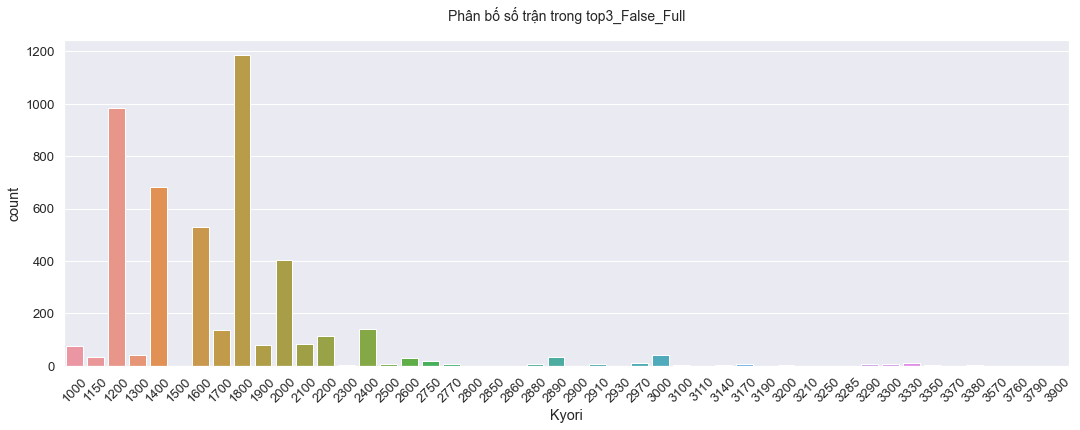

time: 875 ms


In [26]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Kyori", data=top3_False_Full)
plt.title('Phân bố số trận trong top3_False_Full', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

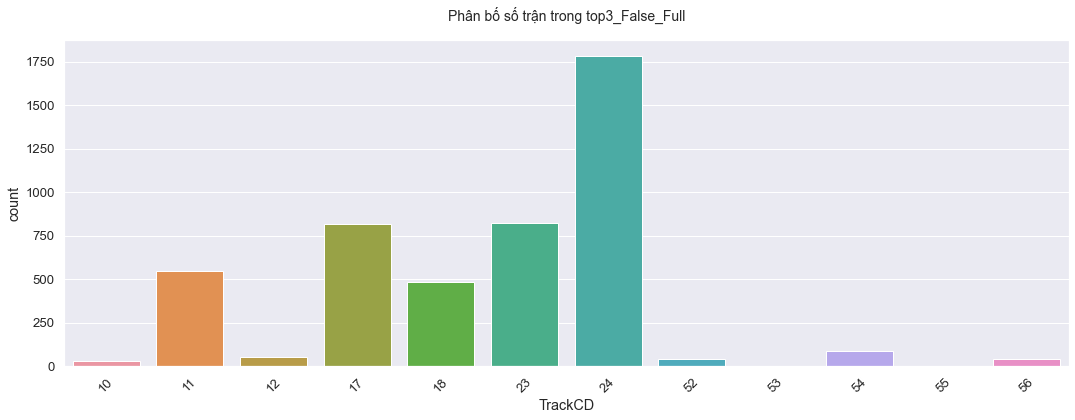

time: 360 ms


In [27]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="TrackCD", data=top3_False_Full)
plt.title('Phân bố số trận trong top3_False_Full', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

### <span style="color:blue">3. Tạo dữ liệu lọc tốc độ thấp theo cự ly </span>  

In [28]:
train_data = df.copy()
train_data = train_data[train_data['id$Year']<2018] 
threshold = 0.05
list_Kyori = train_data['Kyori'].unique()
for Kyori in list_Kyori:
    threshold_speed =train_data[train_data['Kyori']==Kyori]['speed'].quantile(q=threshold)
    train_data.drop(train_data[(train_data['Kyori'] == Kyori)&(train_data['speed'] < threshold_speed)].index, inplace=True) 
train_data                      

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475191,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,1,61.992620
475192,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,0,61.165049
475193,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,0,61.538462
475194,2017,1228,9,5,9,12,34534,2017,12,0,...,1.0,0.0,2.0,,0.0,1,1,,0,60.943168


time: 9.52 s


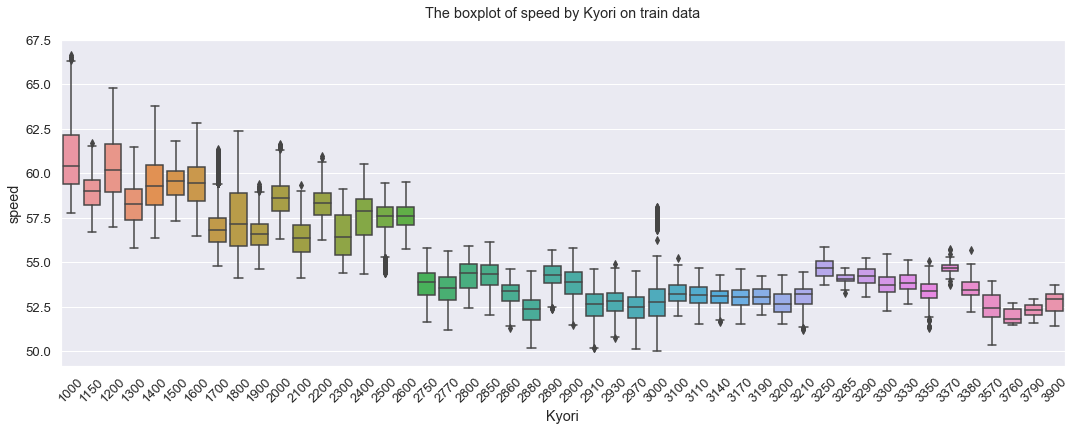

time: 1.53 s


In [90]:
# Vẽ biểu đồ box phân bố tốc độ theo các loại cự ly
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(18, 6))
ax = sns.boxplot(x='Kyori', y="speed", data=data_df);
plt.title('The boxplot of speed by Kyori on train data', y=1.05)
plt.xlabel('Kyori')
plt.ylabel('speed');
plt.setp(ax.get_xticklabels(), rotation=45);

- Save id for new data

In [35]:
filter_Kyori_id = train_data[['race_id', 'KettoNum']]
filter_Kyori_id

,race_id,KettoNum
0,1,2005107051
1,1,2005102028
2,1,2005104156
3,1,2005105319
4,1,2005101044
...,...,...
475191,34534,2012101892
475192,34534,2013104774
475193,34534,2012101704
475194,34534,2012102404


time: 156 ms


In [36]:
filter_Kyori_id.to_csv('filter_Kyori_id.csv', index=False)

time: 734 ms
